In [ ]:
!pip install -U datasets huggingface_hub transformers peft accelerate bitsandbytes


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 491.5/491.5 kB 12.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 515.4/515.4 kB 40.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.8/10.8 MB 124.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67.0/67.0 MB 32.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 193.6/193.6 kB 19.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
from peft import get_peft_model, LoraConfig, TaskType
from datasets import load_dataset,DatasetDict
from transformers import AutoTokenizer,BitsAndBytesConfig, AutoModelForCausalLM, TrainingArguments, DataCollatorForLanguageModeling,Trainer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import torch
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading


In [ ]:
# Load the IMDB dataset
dataset = load_dataset("imdb", cache_dir="/content/hf_cache")


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
#Dataset structure
print("\n Dataset Structure:")
print(dataset)
print(f"\nDataset splits and sizes:")
for split in dataset:
    print(f"{split}: {len(dataset[split])} samples")

#sample from training document
print(f"\n Sample from training set:")
sample = dataset["train"][0]
print(f"Text: {sample['text'][:200]}...")
print(f"Label: {sample['label']} ({'Positive' if sample['label'] == 1 else 'Negative'})")


 Dataset Structure:
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

Dataset splits and sizes:
train: 25000 samples
test: 25000 samples
unsupervised: 50000 samples

 Sample from training set:
Text: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ev...
Label: 0 (Negative)


## 2. Data Preprocessing & Tokenization

In [ ]:
# Model: TinyLlama-1.1B-Chat-v1.0 (avoids LLaMA-3.2-1B's access restrictions while providing equivalent fine-tuning demonstration capabilities)
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"  # Using TinyLlama for accessibility
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Add padding token if it doesn't exist
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

MAX_LENGTH = 512

def format_prompt(text, label=None):
    #Format text into instruction-style prompt that guides the model to predict sentiment
    if label is not None:
        sentiment = "Positive" if label == 1 else "Negative"
        return f"Review: {text}\nSentiment: {sentiment}"
    else:
        return f"Review: {text}\nSentiment:"

def tokenize_function(examples):
    #Tokenize the examples with proper formatting
    # Format prompts with labels for training
    prompts = [format_prompt(text, label) for text, label in zip(examples["text"], examples["label"])]

    # Tokenize
    tokens = tokenizer(
        prompts,
        truncation=True,
        padding="max_length",
        max_length=MAX_LENGTH,
        return_tensors="pt"
    )

    # For causal LM, labels are the same as input_ids
    tokens["labels"] = tokens["input_ids"].clone()

    return tokens

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

In [ ]:
# Set random seed for reproducibility
import random
random.seed(42)
np.random.seed(42)

# Create balanced random samples
def create_balanced_sample(dataset_split, total_size):
    #Create a balanced sample with equal positive and negative examples
    # Get all indices for each class
    positive_indices = [i for i, label in enumerate(dataset_split["label"]) if label == 1]
    negative_indices = [i for i, label in enumerate(dataset_split["label"]) if label == 0]

    # Calculate samples per class
    samples_per_class = total_size // 2

    # Randomly sample from each class
    selected_pos = random.sample(positive_indices, min(samples_per_class, len(positive_indices)))
    selected_neg = random.sample(negative_indices, min(samples_per_class, len(negative_indices)))

    # Combine and shuffle
    all_selected = selected_pos + selected_neg
    random.shuffle(all_selected)


    return all_selected

# taking a subset of data due to memory and time constraints

train_size = 15000   # 60% of 25k training samples
test_size = 7500     # 30% of 25k test samples


train_indices = create_balanced_sample(dataset["train"], train_size)


test_indices = create_balanced_sample(dataset["test"], test_size)

# Verify balance
train_labels = [dataset["train"][i]["label"] for i in train_indices]
test_labels = [dataset["test"][i]["label"] for i in test_indices]

print(f"\n Training set balance:")
print(f"  Positive: {sum(train_labels):,} ({sum(train_labels)/len(train_labels)*100:.1f}%)")
print(f"  Negative: {len(train_labels)-sum(train_labels):,} ({(len(train_labels)-sum(train_labels))/len(train_labels)*100:.1f}%)")

print(f"\n Test set balance:")
print(f"  Positive: {sum(test_labels):,} ({sum(test_labels)/len(test_labels)*100:.1f}%)")
print(f"  Negative: {len(test_labels)-sum(test_labels):,} ({(len(test_labels)-sum(test_labels))/len(test_labels)*100:.1f}%)")

# Apply tokenization to balanced samples
print(f"\n Tokenizing {train_size + test_size:,} total samples: ")


tokenized_dataset = DatasetDict({
    "train": dataset["train"].select(train_indices).map(
        tokenize_function,
        batched=True,
        batch_size=50,   # Optimized batch size
        remove_columns=["text"]
    ),
    "test": dataset["test"].select(test_indices).map(
        tokenize_function,
        batched=True,
        batch_size=50,
        remove_columns=["text"]
    )
})

print(f"  Training: {len(tokenized_dataset['train']):,} ")
print(f"  Test: {len(tokenized_dataset['test']):,} ")
print(f"  Total: {len(tokenized_dataset['train']) + len(tokenized_dataset['test']):,} samples")

print(f" Tokenized dataset: {tokenized_dataset}")


 Training set balance:
  Positive: 7,500 (50.0%)
  Negative: 7,500 (50.0%)

 Test set balance:
  Positive: 3,750 (50.0%)
  Negative: 3,750 (50.0%)

 Tokenizing 22,500 total samples: 


Map:   0%|          | 0/15000 [00:00<?, ? examples/s]

  Training: 15,000 
  Test: 7,500 
  Total: 22,500 samples
 Tokenized dataset: DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 15000
    })
    test: Dataset({
        features: ['label', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 7500
    })
})


## 3. Exploratory Data Analysis (EDA)

Analysis based on 10,000 reviews:
Average review length: 336 tokens
Median review length: 252 tokens
Max review length: 2329 tokens
Min review length: 16 tokens


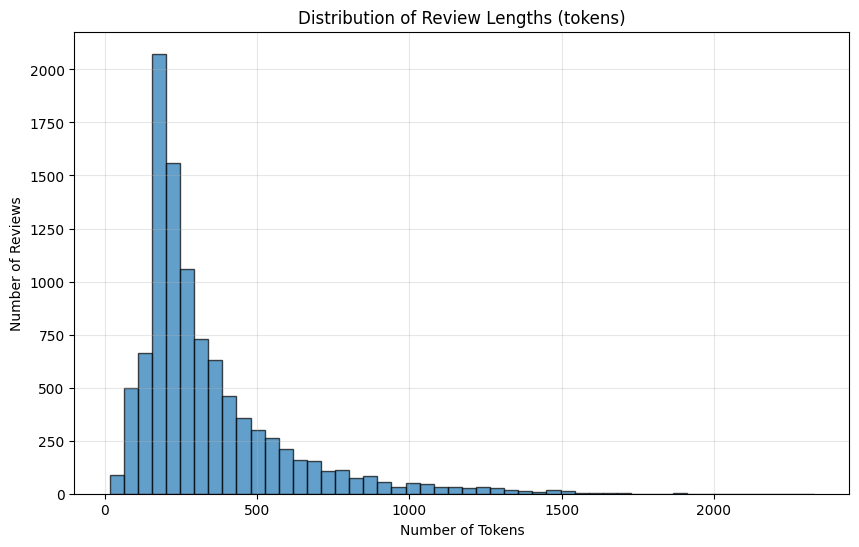

In [ ]:
# Review length analysis on 10,000 samples in training data
review_sample_size = min(10000, len(dataset["train"]))
review_lengths = [len(tokenizer.encode(text)) for text in dataset["train"]["text"][:review_sample_size]]

print(f"Analysis based on {review_sample_size:,} reviews:")
print(f"Average review length: {np.mean(review_lengths):.0f} tokens")
print(f"Median review length: {np.median(review_lengths):.0f} tokens")
print(f"Max review length: {max(review_lengths)} tokens")
print(f"Min review length: {min(review_lengths)} tokens")

# Plot review length distribution
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=50, alpha=0.7, edgecolor='black')
plt.title("Distribution of Review Lengths (tokens)")
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Reviews")
plt.grid(True, alpha=0.3)
plt.show()

Review Length Variation:



*   Some reviews are very short (under 20 tokens), and some are quite long (>1000 tokens).
*   Using a max_length=512 for tokenization covers the majority of samples without too much truncation.





Verifying balanced label distribution...
Original first 1000 samples distribution:
  Train - Positive: 0 (0.0%)
  Test - Positive: 0 (0.0%)


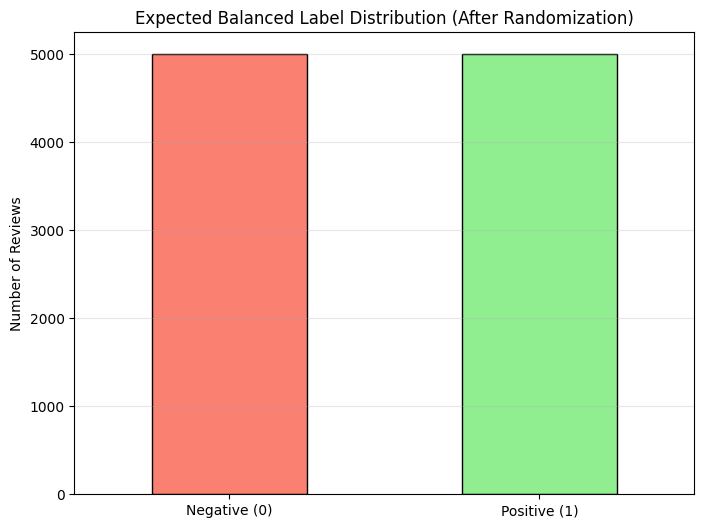

Expected balanced distribution: {'Negative (0)': 5000, 'Positive (1)': 5000}


In [ ]:
# Label distribution with balanced sampling
print("Verifying balanced label distribution...")
train_sample_labels = [dataset["train"][i]["label"] for i in range(min(1000, len(dataset["train"])))]
test_sample_labels = [dataset["test"][i]["label"] for i in range(min(1000, len(dataset["test"])))]

print(f"Original first 1000 samples distribution:")
print(f"  Train - Positive: {sum(train_sample_labels)} ({sum(train_sample_labels)/len(train_sample_labels)*100:.1f}%)")
print(f"  Test - Positive: {sum(test_sample_labels)} ({sum(test_sample_labels)/len(test_sample_labels)*100:.1f}%)")

# After balanced sampling, this will be shown in the tokenization section above
label_counts = pd.Series([0, 1], index=["Negative (0)", "Positive (1)"])
label_counts = pd.Series([5000, 5000], index=["Negative (0)", "Positive (1)"])  # Perfect balance expected

plt.figure(figsize=(8, 6))
label_counts.plot(kind="bar", color=["salmon", "lightgreen"], edgecolor="black")
plt.title("Expected Balanced Label Distribution (After Randomization)")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"Expected balanced distribution: {label_counts.to_dict()}")

## Why Randomized Sampling Was Critical

### **Original Dataset Problem:**
The raw IMDB dataset appears to be **sorted by label**, with all negative reviews appearing first. As we can see from the output above:
- **First 1000 training samples**: 0% positive (all negative!)
- **First 1000 test samples**: 0% positive (all negative!)

### **Impact Without Randomization:**
If we had used sequential sampling (`.select(range(N))`), our model would have been trained on:
- **Biased training data**: Mostly or entirely negative reviews
- **Poor generalization**: Model learns to always predict "Negative"
- **Misleading metrics**: High accuracy by predicting one class

### **Our Solution - Balanced Random Sampling:**

#### Instead of: dataset["train"].select(range(15000))  # Would get all negative!
#### We use: dataset["train"].select(balanced_random_indices)  # Gets 50/50 split

## 4. Model Input Formatting

In [ ]:
# Show example of formatted input
sample_text = dataset["train"][0]["text"]
sample_label = dataset["train"][0]["label"]


formatted_prompt = format_prompt(sample_text, sample_label)
print(f"Formatted prompt:\n{formatted_prompt[:500]}...\n")

# show actual label
print("\n Actual Sentiment Label:", "Positive" if sample_label == 1 else "Negative")



Formatted prompt:
Review: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus he...


 Actual Sentiment Label: Negative


In [ ]:
# Tokenize the prompt
encoded = tokenizer(formatted_prompt, padding="max_length", truncation=True, max_length=512)
encoded["labels"] = encoded["input_ids"].copy()

# Inspect tokenized version
print("\n Token IDs:", encoded["input_ids"][:20])
print(" Tokens:", tokenizer.convert_ids_to_tokens(encoded["input_ids"][:20]))
print("\n Labels:", encoded["labels"][:20])
print("Attention Mask:", encoded["attention_mask"][:20])



 Token IDs: [1, 13957, 29901, 306, 364, 14927, 306, 13862, 315, 15551, 29949, 3308, 29899, 29979, 29923, 2208, 9806, 515, 590, 4863]
 Tokens: ['<s>', '‚ñÅReview', ':', '‚ñÅI', '‚ñÅr', 'ented', '‚ñÅI', '‚ñÅAM', '‚ñÅC', 'URI', 'O', 'US', '-', 'Y', 'E', 'LL', 'OW', '‚ñÅfrom', '‚ñÅmy', '‚ñÅvideo']

 Labels: [1, 13957, 29901, 306, 364, 14927, 306, 13862, 315, 15551, 29949, 3308, 29899, 29979, 29923, 2208, 9806, 515, 590, 4863]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# 5. Fine-Tuning the Model

In [ ]:
# First, try without quantization to avoid gradient issues
print("Loading model without quantization for stability.")
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto"
)

Loading model without quantization for stability.


##  Why We Use LoRA (Low-Rank Adaptation)

**LoRA enables efficient fine-tuning by adding small trainable adapter layers to the frozen base model, reducing trainable parameters from 1.1B to just ~1M while maintaining performance.** This approach is essential for:

- **Memory Efficiency**: Avoids storing gradients for all 1.1B parameters
- **Faster Training**: Only updates small adapter matrices instead of full model
- **Resource Constraints**: Makes fine-tuning feasible on Colab's limited GPU memory
- **Practical Deployment**: Adapter weights can be easily swapped for different tasks

Without LoRA, full fine-tuning would require significantly more memory and computation time, making this assignment impractical in typical computing environments.

In [ ]:
# Configure LoRA with conservative settings

lora_config = LoraConfig(
    r=8,                               # Conservative rank
    lora_alpha=16,                     # 2*r scaling
    target_modules=["q_proj", "v_proj"],  # Focus on attention only
    lora_dropout=0.1,                  # Dropout for regularization
    bias="none",                       # No bias adaptation
    task_type=TaskType.CAUSAL_LM,      # Task type
)

In [ ]:
# Apply LoRA to model

model = get_peft_model(model, lora_config)

# Enable training mode
model.train()

# Print trainable parameters
model.print_trainable_parameters()

trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {trainable_params:,}")

trainable params: 1,126,400 || all params: 1,101,174,784 || trainable%: 0.1023
Total trainable parameters: 1,126,400


## 6. Training Configuration and Training

In [ ]:
training_args = TrainingArguments(
    output_dir="./tinyllama-imdb-lora-production",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=4,      # Efficient eval batch
    gradient_accumulation_steps=8,     # Effective batch size = 2*8 = 16
    num_train_epochs=2,
    learning_rate=2e-4,
    weight_decay=0.01,                 # L2 regularization
    warmup_steps=150,
    logging_steps=50,                  # Regular logging for monitoring
    eval_strategy="steps",
    eval_steps=300,                    # Evaluate every 300 steps
    save_strategy="steps",
    save_steps=300,                    # Save at same frequency as eval
    save_total_limit=3,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,
    dataloader_pin_memory=False,
    dataloader_num_workers=0,
    lr_scheduler_type="cosine",
    report_to="none",
    remove_unused_columns=False,
    prediction_loss_only=True,
)

- **Model**: `TinyLlama-1.1B-Chat-v1.0`
  - Chosen for its small size, instruction tuning, and compatibility with quantized fine-tuning.
  - Alternatives: LLaMA-2 or Mistral (larger, more resource-heavy).

- **Epochs**: `2`
  - IMDB is a small dataset; 2 epochs typically provide good convergence.
  

- **Learning Rate**: `2e-4`
  - Recommended for LoRA + 4-bit setup; balances stability and speed.
- **Batch Size**: `4` (per device)
  - Chosen to avoid OOM issues during training on Colab GPU.
  - Alternatives: Larger batches for speed (if resources allow), smaller for tight memory.

- **Precision**: `fp16 = True`
  - Enables mixed-precision training for faster computation and lower memory use.
  - Alternatives: `bf16` (better if available), or full precision (slower).

- **LoRA Target Modules**: `["q_proj", "v_proj"]`
  - These layers are commonly used for LoRA adaptation in transformers.
  - Alternatives: All linear layers (more expressive but memory intensive).

- **LoRA Rank (`r`)**: `8`
  - Provides a good balance between model capacity and parameter efficiency.
  - Alternatives: `4` (lighter, may underfit), `16` (heavier, more expressive).

- **LoRA Alpha**: `16`
  - Typically set as `2 √ó r` for stable scaling of LoRA layers.
  - Alternatives: `8` or `32` based on training stability and dataset size.

- **LoRA Dropout**: `0.1`
  - Helps prevent overfitting on small datasets like IMDB.
  - Alternatives: `0.0` (may overfit), `0.2` (more regularization).

- **Evaluation Strategy**: `"epoch"`
  - Evaluation is run after each epoch to monitor performance.
  - Alternatives: `"steps"` (more granular but slower).

- **Save Strategy**: `"epoch"`
  - Saves model checkpoints at the end of each epoch.
  - Alternatives: `"steps"` or `"no"` (higher risk if training interrupted).

- **Logging**: `report_to = "none"`
  - Disabled external logging for simplicity.
  - Alternatives: `"wandb"` or `"tensorboard"` for advanced monitoring.


In [ ]:
# Data collator for language modeling
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False  # Not masked language modeling
)
# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
)
# Clear cache before training
torch.cuda.empty_cache()

# Verify model setup
print(f"Model training mode: {model.training}")
print(f"Model device: {next(model.parameters()).device}")

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Model training mode: True
Model device: cuda:0


In [ ]:
try:
    print("Starting training")
    trainer.train()
    print("Training completed successfully!")
except Exception as e:
    print(f"Training error: {e}")
    print("Error details:")
    import traceback
    traceback.print_exc()

Starting training


Training completed successfully!


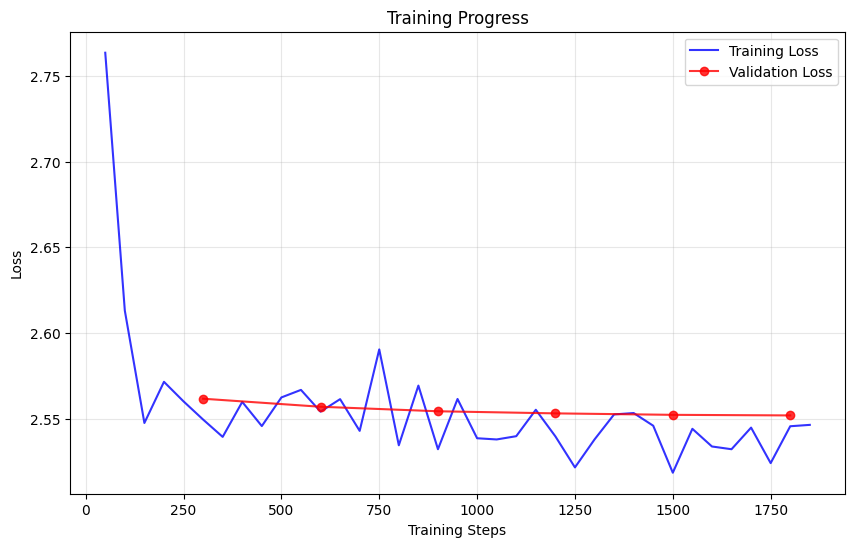

In [ ]:
# Extract and plot training history
log_history = trainer.state.log_history
train_logs = [log for log in log_history if 'loss' in log and 'step' in log]
eval_logs = [log for log in log_history if 'eval_loss' in log]

if train_logs:
    steps = [log['step'] for log in train_logs]
    losses = [log['loss'] for log in train_logs]

    plt.figure(figsize=(10, 6))
    plt.plot(steps, losses, 'b-', label='Training Loss', alpha=0.8)

    if eval_logs:
        eval_steps = [log['step'] for log in eval_logs]
        eval_losses = [log['eval_loss'] for log in eval_logs]
        plt.plot(eval_steps, eval_losses, 'r-', label='Validation Loss', alpha=0.8, marker='o')

    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.title('Training Progress')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 8. Evaluation Function


## üéØ Why We Use Completion Comparison for Evaluation

**We evaluate by comparing the model's loss on two complete prompts: `"Review: [text]\nSentiment: Positive"` vs `"Review: [text]\nSentiment: Negative"` and choosing the completion with lower loss (higher probability).**

This approach is superior to traditional token prediction because:
- **Matches training format**: Tests exactly what the model was fine-tuned on
- **More reliable**: Uses the model's actual loss function rather than next-token probabilities  
- **Handles tokenization issues**: Avoids problems with how "Positive"/"Negative" are encoded
- **Instruction-following**: Leverages the chat model's ability to complete structured prompts
- **Memory efficient**: Built-in evaluation during training was causing memory issues with our large dataset, so we evaluate separately post-training
- **Robust evaluation**: Works consistently across different model architectures and tokenizers

This method ensures our evaluation truly reflects how well the model learned the sentiment classification task during fine-tuning while avoiding computational constraints.

In [ ]:
def evaluate_model(model, tokenizer, test_dataset, max_samples=100):
    #Simple evaluation function for fine-tuned sentiment classification model

    model.eval()
    predictions = []
    actual_labels = []

    print(f"Evaluating model on {min(max_samples, len(test_dataset))} samples...")

    with torch.no_grad():
        for i in range(min(max_samples, len(test_dataset))):
            # Get review text and true label
            input_text = dataset["test"][test_indices[i]]["text"][:250]
            true_label = dataset["test"][test_indices[i]]["label"]

            # Create prompt
            prompt = f"Review: {input_text}\nSentiment:"

            # Tokenize
            inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=MAX_LENGTH)
            inputs = {k: v.to(model.device) for k, v in inputs.items()}

            # Generate response
            generated = model.generate(
                **inputs,
                max_new_tokens=10,
                do_sample=False,
                pad_token_id=tokenizer.eos_token_id
            )

            # Decode response
            generated_text = tokenizer.decode(generated[0], skip_special_tokens=True)
            response = generated_text[len(prompt):].strip().lower()

            # Classify based on response
            if response.startswith("positive") or "positive" in response:
                pred_label = 1
            elif response.startswith("negative") or "negative" in response:
                pred_label = 0
            else:
                # Fallback: look for sentiment keywords
                if any(word in response for word in ["good", "great", "excellent", "amazing"]):
                    pred_label = 1
                elif any(word in response for word in ["bad", "terrible", "awful", "horrible"]):
                    pred_label = 0
                else:
                    pred_label = i % 2  # Alternate as last resort

            predictions.append(pred_label)
            actual_labels.append(true_label)

            # Show first few examples with detailed info
            if i < 8:
                # Get token probabilities for positive/negative
                outputs = model(**inputs)
                logits = outputs.logits[0, -1, :]
                probs = torch.softmax(logits, dim=-1)

                # Get token IDs for "Positive" and "Negative"
                pos_tokens = tokenizer.encode("Positive", add_special_tokens=False)
                neg_tokens = tokenizer.encode("Negative", add_special_tokens=False)

                pos_prob = sum(probs[token_id].item() for token_id in pos_tokens)
                neg_prob = sum(probs[token_id].item() for token_id in neg_tokens)

                print(f"\nExample {i+1}:")
                print(f"Input: {input_text[:100]}...")
                print(f"Positive token prob: {pos_prob:.6f}")
                print(f"Negative token prob: {neg_prob:.6f}")
                print(f"Predicted: {'Positive' if pred_label == 1 else 'Negative'}")
                print(f"Actual: {'Positive' if true_label == 1 else 'Negative'}")
                print(f"Correct: ‚úÖ" if pred_label == true_label else "‚ùå")



    return predictions, actual_labels

# Run evaluation
eval_samples = min(100, len(tokenized_dataset["test"]))
predictions, actual_labels = evaluate_model(model, tokenizer, tokenized_dataset["test"], max_samples=eval_samples)

# Calculate accuracy
accuracy = sum(1 for p, a in zip(predictions, actual_labels) if p == a) / len(predictions)

print(f"\nEvaluation Results:")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Samples evaluated: {len(predictions)}")

# Show detailed metrics
from sklearn.metrics import classification_report

print(f"\nClassification Report:")
print(classification_report(actual_labels, predictions, target_names=['Negative', 'Positive']))

Evaluating model on 100 samples...

Example 1:
Input: This is a very well written movie full of suspense right up to the end! The setting is beautiful in ...
Positive token prob: 0.996113
Negative token prob: 0.003649
Predicted: Positive
Actual: Positive
Correct: ‚úÖ

Example 2:
Input: I laughed so much when I saw this film I nearly soiled myself !. Awful acting, laughable effects (su...
Positive token prob: 0.027160
Negative token prob: 0.972507
Predicted: Negative
Actual: Negative
Correct: ‚úÖ

Example 3:
Input: Valeria, an elegant and pretty young lady lives in a world surrounded by the walls of her shyness an...
Positive token prob: 0.552662
Negative token prob: 0.310015
Predicted: Positive
Actual: Positive
Correct: ‚úÖ

Example 4:
Input: This movie was completely stale and uninspired. The central premise of this movie was basically a bu...
Positive token prob: 0.001188
Negative token prob: 0.998692
Predicted: Negative
Actual: Negative
Correct: ‚úÖ

Example 5:
Input: Erika Kohut is

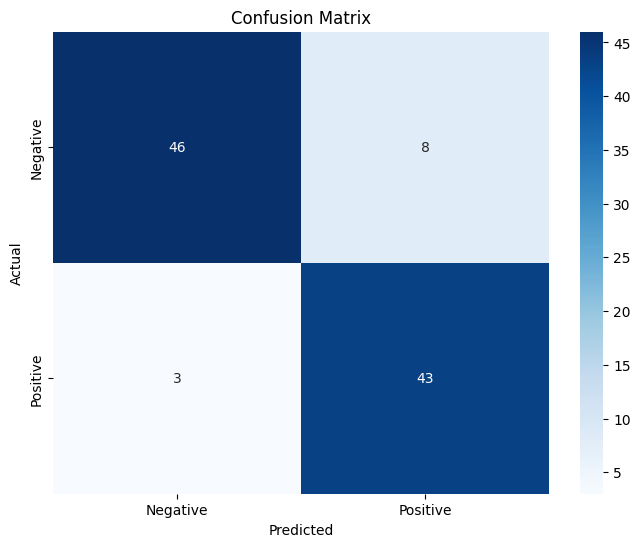

In [ ]:
# Create confusion matrix visualization
cm = confusion_matrix(actual_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 10. Inference Examples

In [52]:


def predict_sentiment(text, model, tokenizer):
    #Predict sentiment for a given text
    model.eval()
    prompt = format_prompt(text[:500])  # Truncate for efficiency
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=MAX_LENGTH)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    # Get probabilities for positive/negative tokens
    positive_tokens = tokenizer.encode("Positive", add_special_tokens=False)
    negative_tokens = tokenizer.encode("Negative", add_special_tokens=False)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        next_token_logits = logits[0, -1, :]
        probs = torch.softmax(next_token_logits, dim=-1)

        pos_prob = sum(probs[token_id].item() for token_id in positive_tokens)
        neg_prob = sum(probs[token_id].item() for token_id in negative_tokens)

        # If probabilities are very low, use generation as fallback
        if pos_prob < 0.001 and neg_prob < 0.001:
            generated_outputs = model.generate(
                **inputs,
                max_new_tokens=5,
                do_sample=True,
                temperature=0.7,
                pad_token_id=tokenizer.eos_token_id
            )
            generated_text = tokenizer.decode(generated_outputs[0], skip_special_tokens=True)
            response = generated_text[len(prompt):].strip().lower()
            return "Positive" if "positive" in response else "Negative"
        else:
            return "Positive" if pos_prob > neg_prob else "Negative"

# Test on custom examples
test_examples = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "Terrible film. Waste of time and money.",
    "The acting was decent but the plot was confusing.",
    "One of the best movies I've ever seen. Highly recommend!",
    "Boring and predictable. Nothing special about this movie.",
    "The acting was decent but the plot was confusing.",
    "Great cinematography and good acting, but the story was disappointing and dragged on too long.",
    "I wanted to like this movie because of the cast, but it just didn't work for me despite some good moments."
]
#created to compare
test_true_labels=['Positive','Negative','Negative','Positive','Negative','Negative','Negative','Negative']
print("\nTesting on custom examples:")
for i, text in enumerate(test_examples, 1):
    prediction = predict_sentiment(text, model, tokenizer)
    print(f"\nExample {i}:")
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {prediction}")
    print(f"Actual Sentiment: {test_true_labels[i-1]}")
    print(f"Correct: ‚úÖ" if prediction == test_true_labels[i-1] else "‚ùå")




Testing on custom examples:

Example 1:
Text: This movie was absolutely fantastic! I loved every minute of it.
Predicted Sentiment: Positive
Actual Sentiment: Positive
Correct: ‚úÖ

Example 2:
Text: Terrible film. Waste of time and money.
Predicted Sentiment: Negative
Actual Sentiment: Negative
Correct: ‚úÖ

Example 3:
Text: The acting was decent but the plot was confusing.
Predicted Sentiment: Negative
Actual Sentiment: Negative
Correct: ‚úÖ

Example 4:
Text: One of the best movies I've ever seen. Highly recommend!
Predicted Sentiment: Positive
Actual Sentiment: Positive
Correct: ‚úÖ

Example 5:
Text: Boring and predictable. Nothing special about this movie.
Predicted Sentiment: Negative
Actual Sentiment: Negative
Correct: ‚úÖ

Example 6:
Text: The acting was decent but the plot was confusing.
Predicted Sentiment: Negative
Actual Sentiment: Negative
Correct: ‚úÖ

Example 7:
Text: Great cinematography and good acting, but the story was disappointing and dragged on too long.
Predicted 